# Tutorial 5

April 17

In [4]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.datasets import load_boston,load_diabetes
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

## General Linear Models

Source 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

In [60]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]



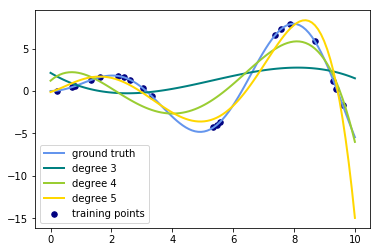

In [61]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)
plt.legend(loc='lower left')
plt.show()